In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']=400
link = 'https://assets.datacamp.com/production/repositories/2292/datasets/641637adb6bb68e783df75895922dc5922ce8cae/data_viz_website_2018_02.csv'
df = pd.read_csv(link, parse_dates = ['visit_date'])

In [20]:
df.head()

,visit_date,condition,time_spent_homepage_sec,clicked_article,clicked_like,clicked_share,article_published
0,2018-02-01,tips,58.122134,1,0,0,no
1,2018-02-01,tips,61.358279,1,0,0,no
2,2018-02-01,tips,59.751284,0,1,0,no
3,2018-02-01,tips,59.622363,1,0,0,no
4,2018-02-01,tips,60.730643,0,0,0,no


In [21]:
clicked = df[['condition', 'clicked_like']]

In [22]:
clicked.groupby('condition')['clicked_like'].mean()

condition
tips     0.118500
tools    0.063857
Name: clicked_like, dtype: float64

In [26]:
control_df = clicked[clicked['condition'] == 'tips']
test_df = clicked[clicked['condition'] == 'tools']

control = control_df['clicked_like']
test = test_df['clicked_like']

In [27]:
from scipy import stats
results = stats.ttest_ind(control, test)
p_value = results[1]
print("The p value is " + str(p_value))

The p value is 4.8358499152426224e-57


In [28]:
link = 'https://assets.datacamp.com/production/repositories/2292/datasets/0bf4e4ad8f92a2e2bae889aa327a96610ac6675d/data_viz_website_2018_05.csv'
df = pd.read_csv(link, parse_dates = ['visit_date'])

In [29]:
df.head()

,visit_date,word_one,word_two,time_spent_homepage_sec,clicked_article,clicked_like,clicked_share
0,2018-05-01,tips,better,48.385073,0,0,0
1,2018-05-01,tips,better,47.260858,0,0,0
2,2018-05-01,tips,better,49.153158,1,1,0
3,2018-05-01,tips,better,48.569565,0,0,0
4,2018-05-01,tips,better,48.460653,1,1,0


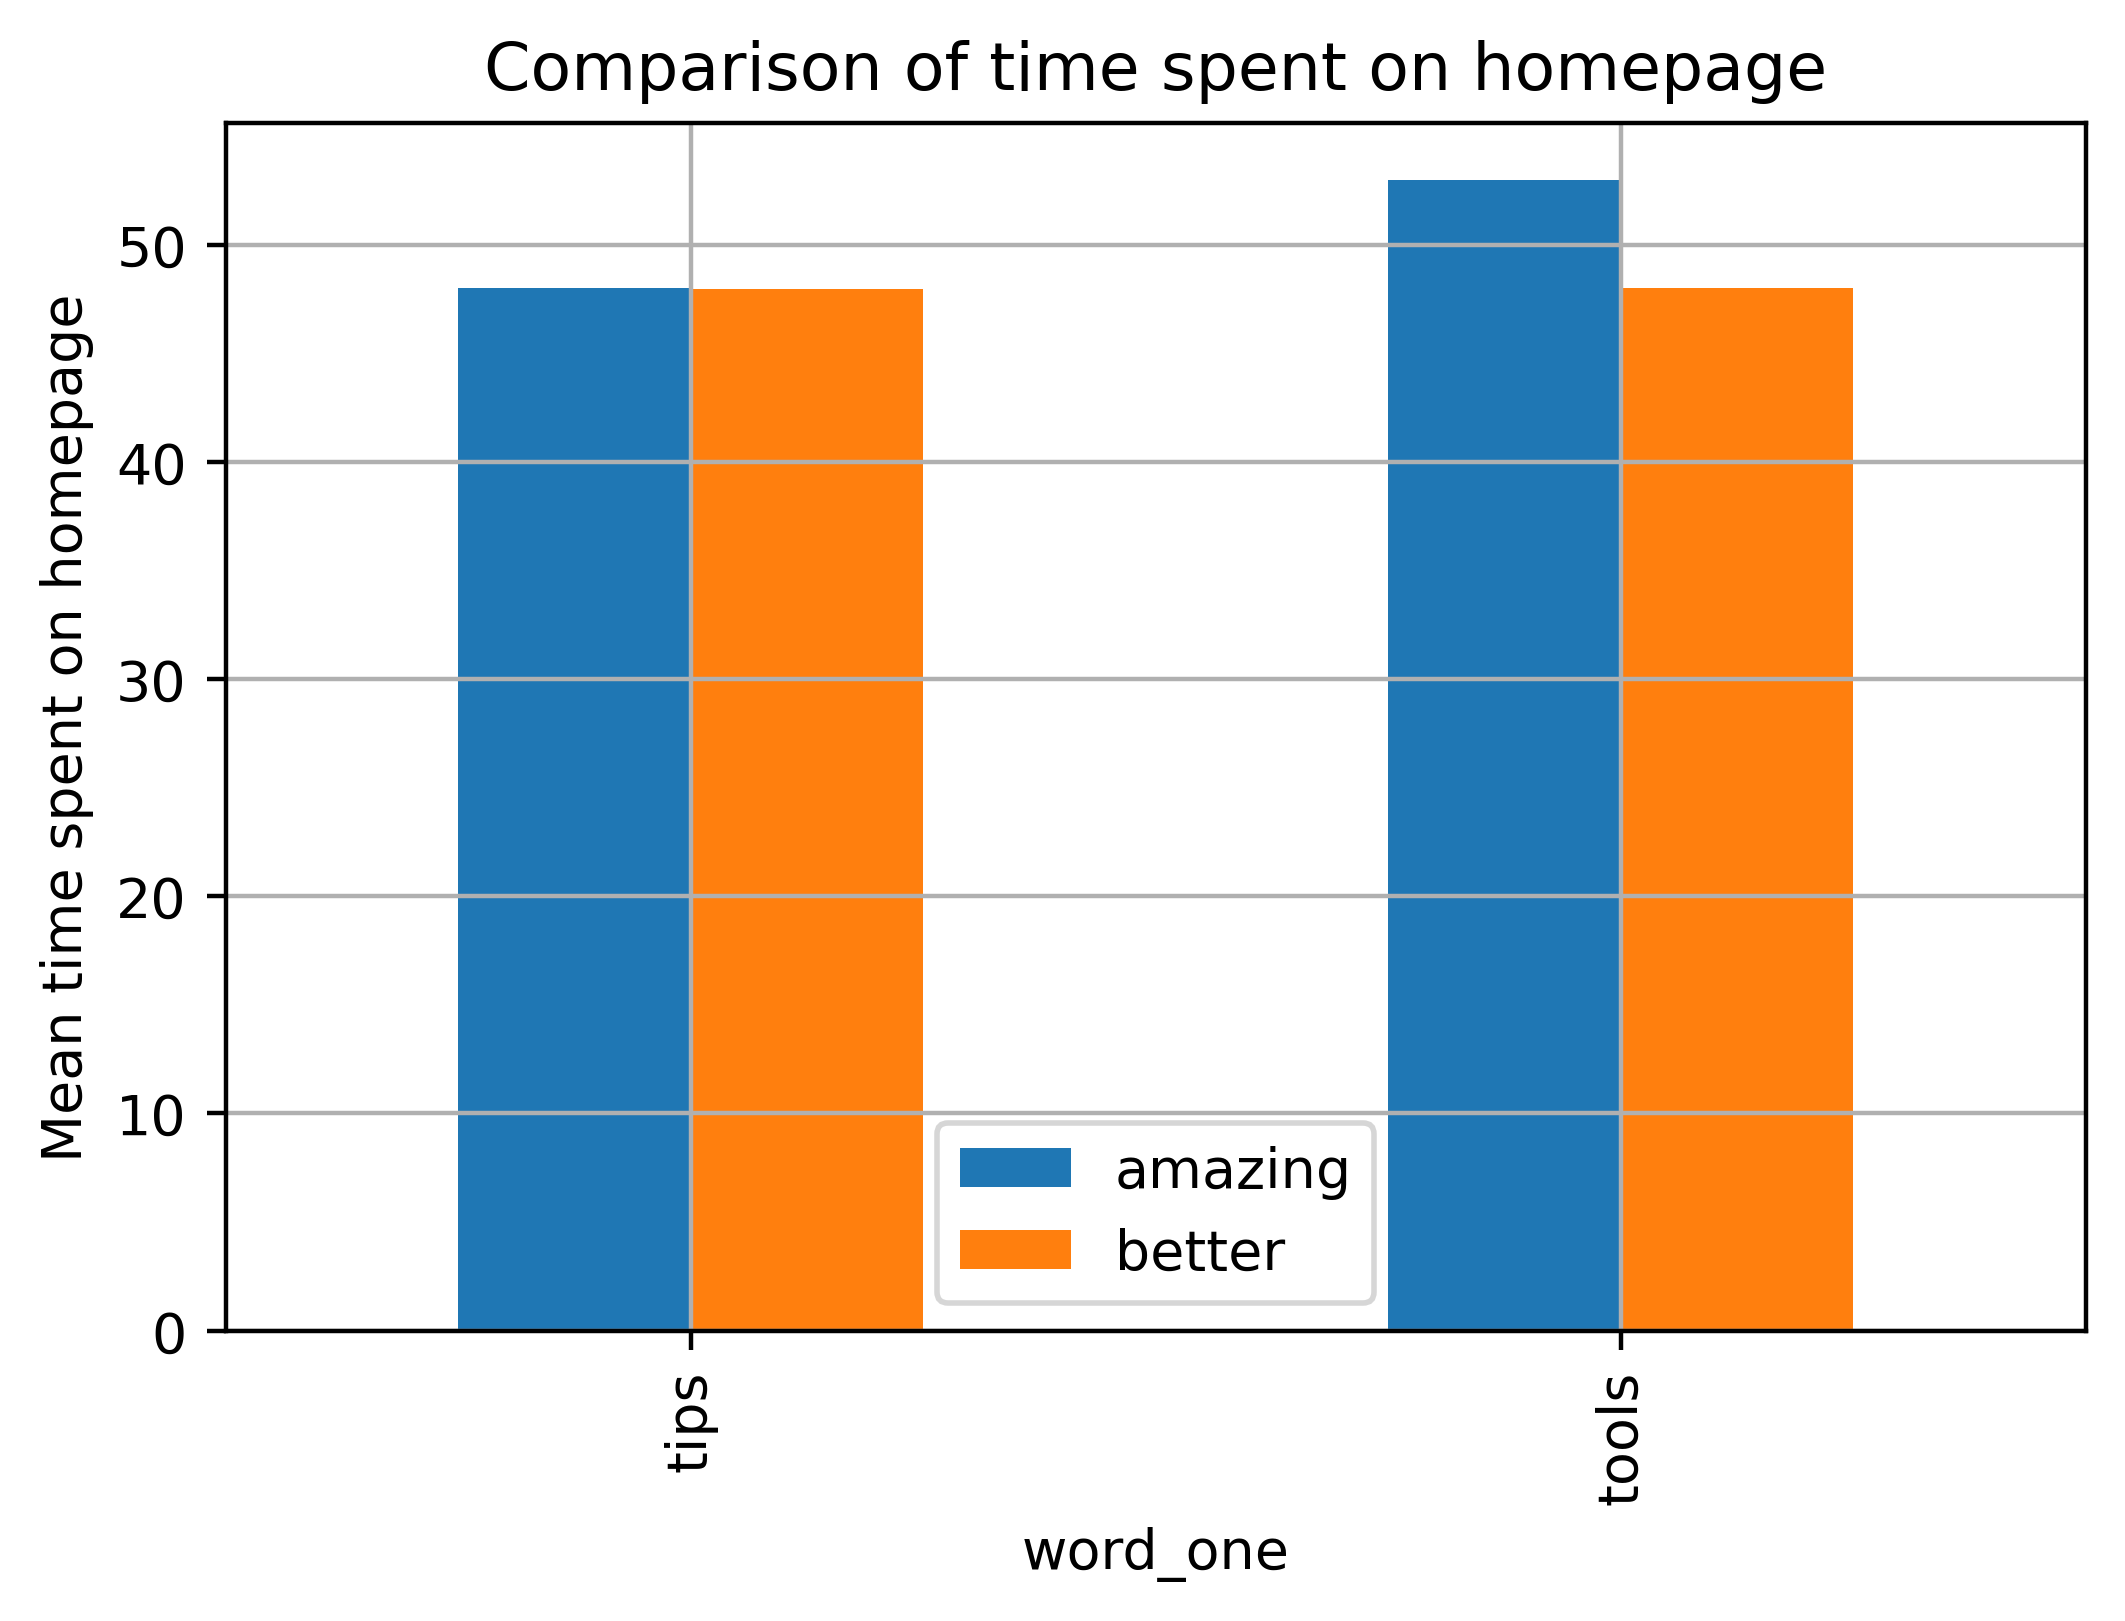

In [40]:
grouped = pd.DataFrame(df.groupby(['word_one', 'word_two'])['time_spent_homepage_sec'].mean())
grouped = grouped.unstack(level=1)

grouped.plot(kind='bar')
plt.title('Comparison of time spent on homepage')
plt.ylabel("Mean time spent on homepage")
plt.grid(True)
plt.legend(labels=['amazing', 'better'])

In [43]:
grouped

clicked_like          
word_two      amazing    better
word_one                       
tips         0.210000  0.213226
tools        0.413484  0.108903

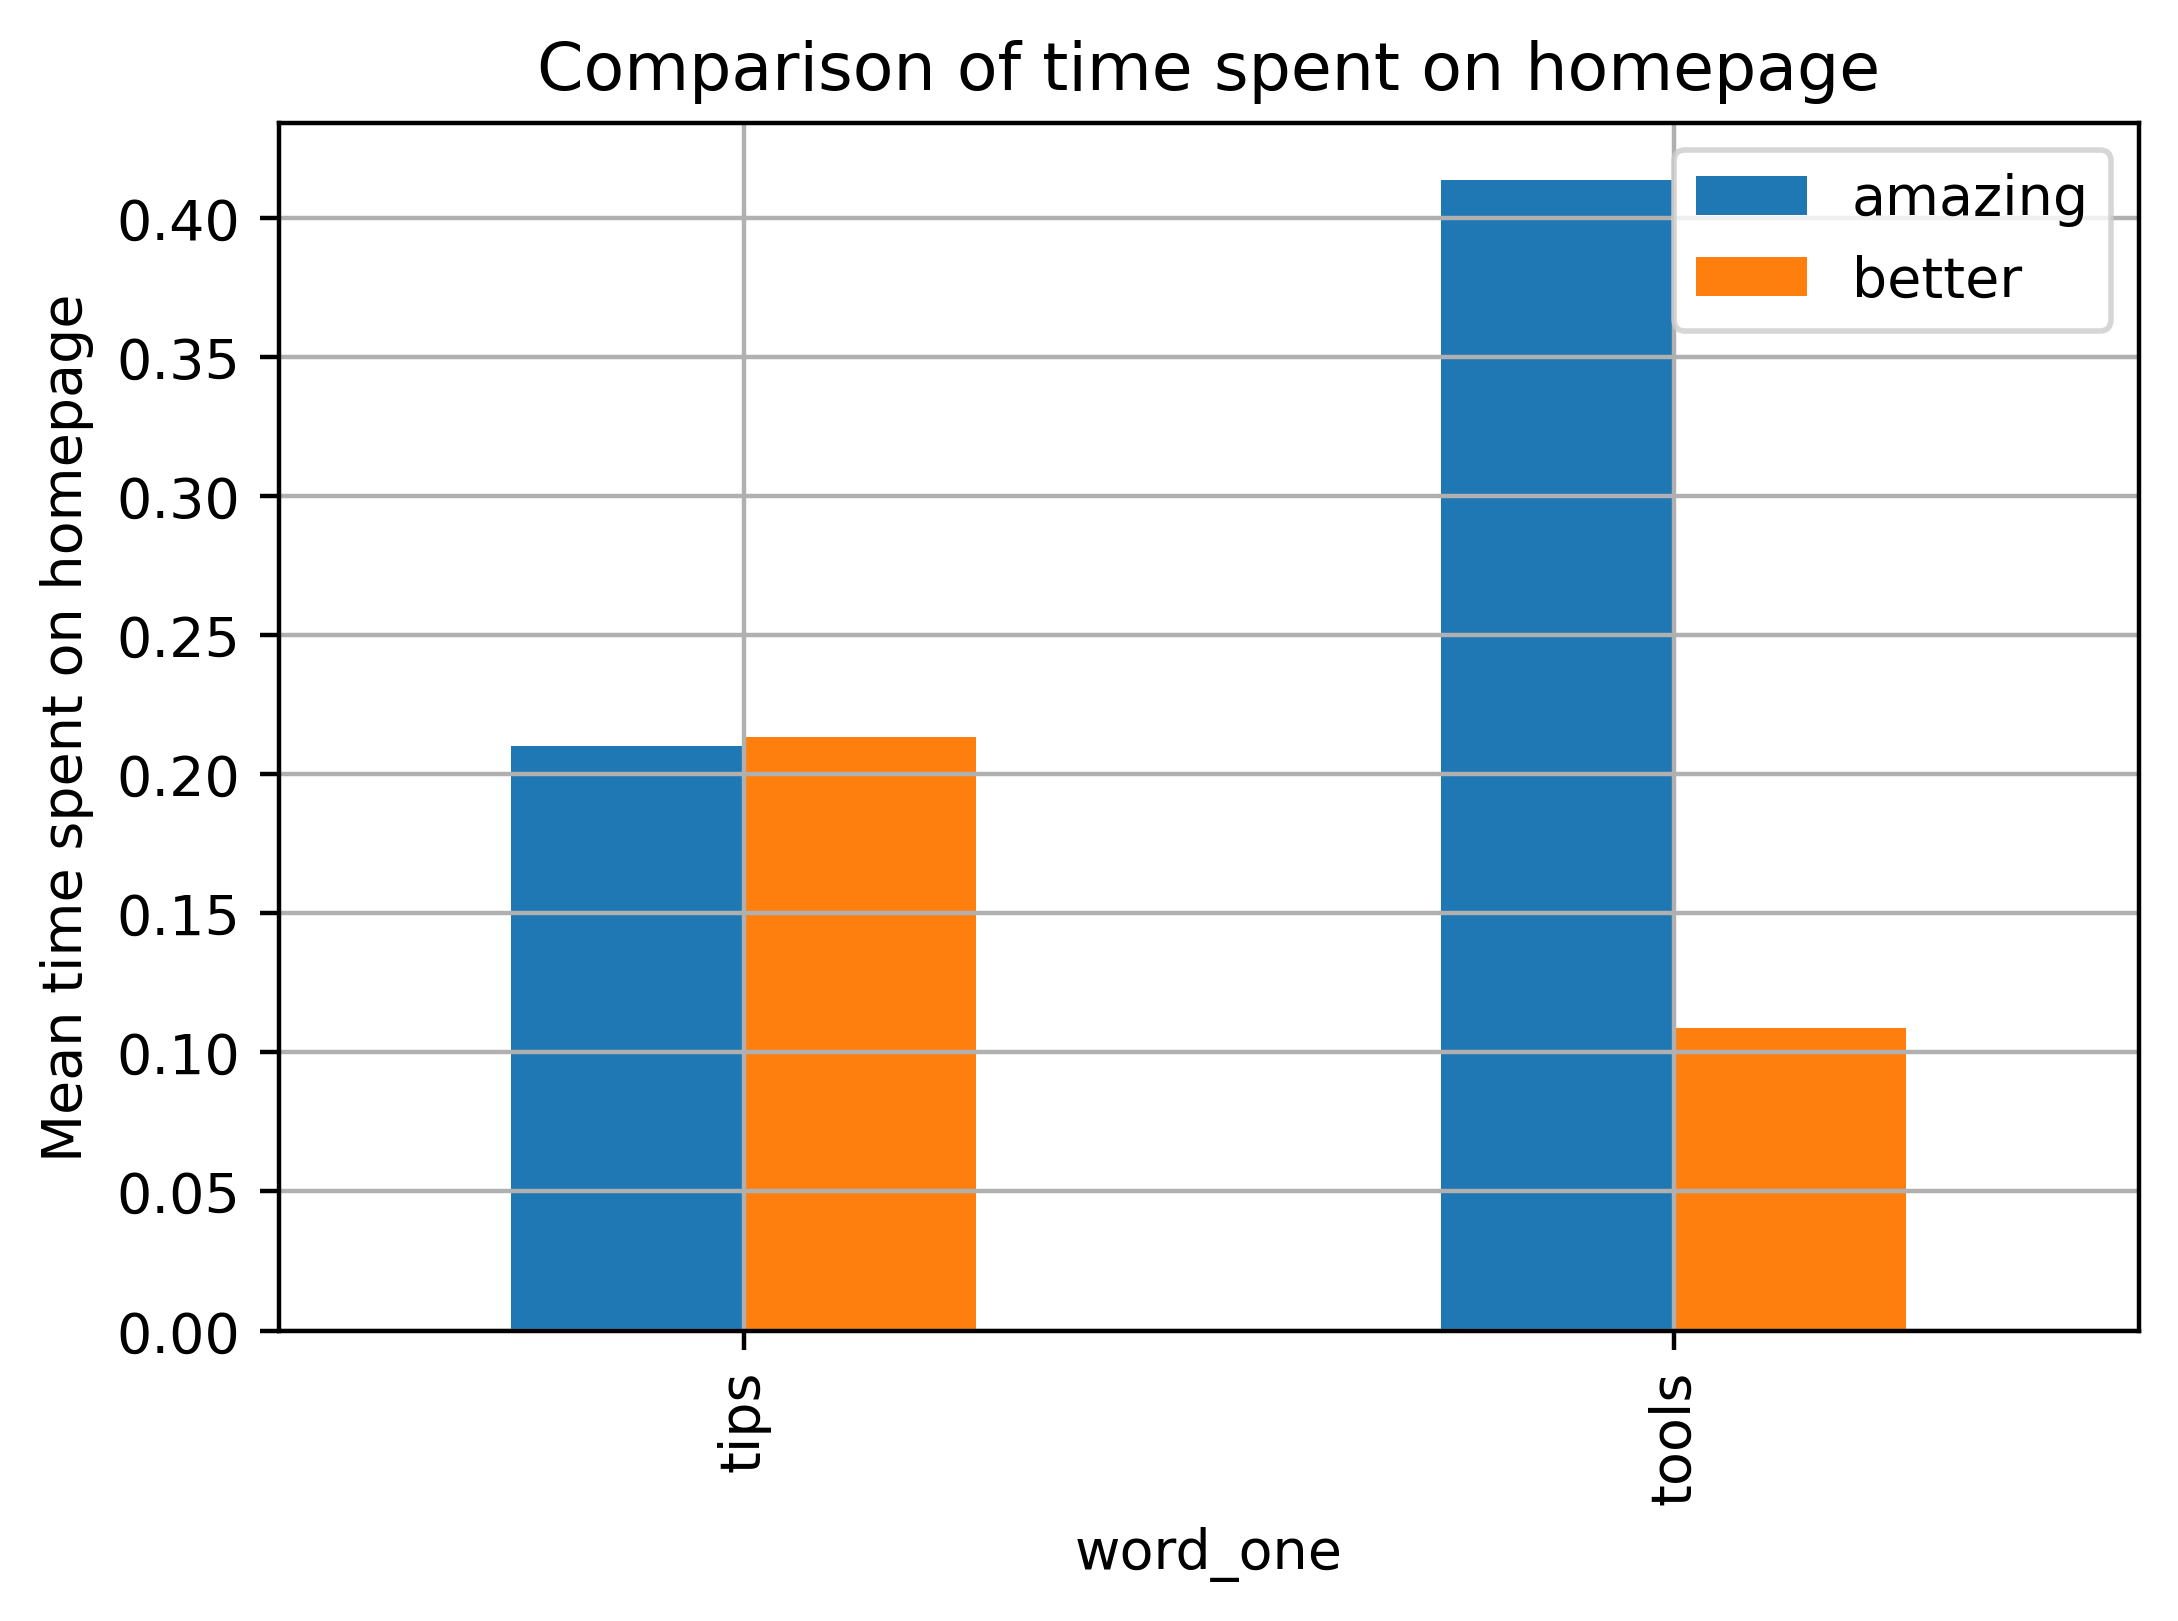

In [41]:
grouped = pd.DataFrame(df.groupby(['word_one', 'word_two'])['clicked_like'].mean())
grouped = grouped.unstack(level=1)
grouped.plot(kind='bar')
plt.title('Comparison of time spent on homepage')
plt.ylabel("Mean time spent on homepage")
plt.grid(True)
plt.legend(labels=['amazing', 'better'])

In [80]:
groupA = df[df['word_one']=='tips'][['word_two','clicked_like']]
groupB = df[df['word_one']=='tools'][['word_two','clicked_like']]

In [81]:
groupAA = groupA[groupA['word_two']=='better'][['clicked_like']]
groupAB = groupA[groupA['word_two']=='amazing'][['clicked_like']]
groupBA = groupB[groupB['word_two']=='better'][['clicked_like']]
groupBB = groupB[groupB['word_two']=='amazing'][['clicked_like']]

In [97]:
groupAA.mean()

tips_better    0.213226
dtype: float64

In [106]:
df_index = groupAA.merge(groupAB, left_index=True, right_index=True)

In [107]:
df_index

,tips_better,tips_amazing


In [58]:
import scipy.stats as stats
fvalue, pvalue = stats.f_oneway(groupAA, groupAB, groupBA, groupBB)
print(fvalue, pvalue)

[1499.45722825] [0.]


In [ ]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols
# reshape the d dataframe suitable for statsmodels package 
d_melt = pd.melt(d.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])
# replace column names
d_melt.columns = ['index', 'treatments', 'value']
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table